In [19]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings

warnings.filterwarnings('ignore')

from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.utils import load_img, img_to_array

In [48]:
base_dir = 'images'
test_dir = 'test_images'

# Create datasets
train_datagen = image_dataset_from_directory(base_dir,
                                             image_size=(64, 64),
                                             subset='training',
                                             seed=1,
                                             validation_split=0.1,
                                             batch_size=64)
test_datagen = image_dataset_from_directory(test_dir,
                                            image_size=(64, 64),
                                            subset='validation',
                                            seed=1,
                                            validation_split=0.1,
                                            batch_size=64)

Found 47009 files belonging to 2 classes.
Using 42309 files for training.
Found 11649 files belonging to 2 classes.
Using 1164 files for validation.


In [52]:
model = Sequential([
    Flatten(),
    Dense(512, activation='sigmoid'),
    Dense(128, activation='sigmoid'),
    Dense(16, activation='sigmoid'),
    Dense(1, activation='sigmoid')

])
print("Built model successfully!~")

Built model successfully!~


In [22]:
# model.summary()

Epoch 1/10
662/662 [==============================] - 30s 43ms/step - loss: 0.6944 - accuracy: 0.5006 - val_loss: 0.6941 - val_accuracy: 0.4914
Epoch 2/10
662/662 [==============================] - 28s 42ms/step - loss: 0.6936 - accuracy: 0.4998 - val_loss: 0.6930 - val_accuracy: 0.5086
Epoch 3/10
662/662 [==============================] - 28s 42ms/step - loss: 0.6935 - accuracy: 0.5020 - val_loss: 0.6931 - val_accuracy: 0.5086
Epoch 4/10
662/662 [==============================] - 28s 42ms/step - loss: 0.6934 - accuracy: 0.4989 - val_loss: 0.6932 - val_accuracy: 0.4914
Epoch 5/10
662/662 [==============================] - 28s 42ms/step - loss: 0.6933 - accuracy: 0.5017 - val_loss: 0.6931 - val_accuracy: 0.5086
Epoch 6/10
662/662 [==============================] - 28s 42ms/step - loss: 0.6933 - accuracy: 0.4994 - val_loss: 0.6930 - val_accuracy: 0.5086
Epoch 7/10
662/662 [==============================] - 28s 42ms/step - loss: 0.6933 - accuracy: 0.5011 - val_loss: 0.6931 - val_accuracy:

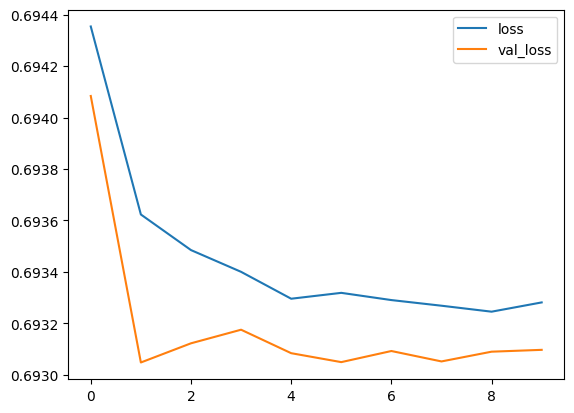

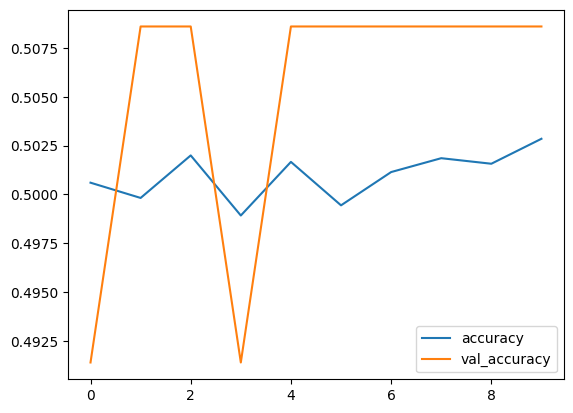

In [53]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_datagen,
                    epochs=10,
                    validation_data=test_datagen)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()

1/1 [==============================] - 0s 102ms/step
[[0.50161123]]


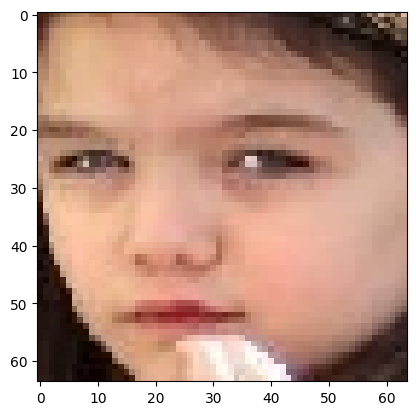

In [54]:
# CLASSIFICATION
test_image = load_img('images/female/131541.jpg.jpg', target_size=(64, 64))

# For show image
plt.imshow(test_image)
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Result array
result = model.predict(test_image)
print(result)

In [55]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 12288)             0         
                                                                 
 dense_36 (Dense)            (None, 512)               6291968   
                                                                 
 dense_37 (Dense)            (None, 128)               65664     
                                                                 
 dense_38 (Dense)            (None, 16)                2064      
                                                                 
 dense_39 (Dense)            (None, 1)                 17        
                                                                 
Total params: 6,359,713
Trainable params: 6,359,713
Non-trainable params: 0
_________________________________________________________________


In [56]:
results = model.evaluate(test_datagen,
                             batch_size=32)

19/19 [==============================] - 1s 17ms/step - loss: 0.6931 - accuracy: 0.5086


In [57]:
test_2_datagen = image_dataset_from_directory(test_dir,
                                            image_size=(64, 64),
                                            seed=1,
                                            batch_size=64)
test_2_result = model.evaluate(test_2_datagen)

Found 11649 files belonging to 2 classes.
183/183 [==============================] - 5s 24ms/step - loss: 0.6932 - accuracy: 0.4986
